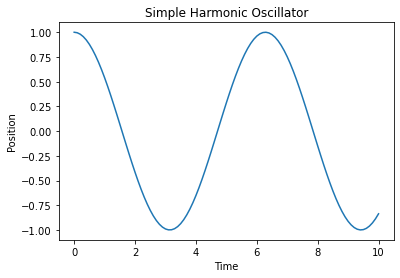

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Define the function for the Simple Harmonic Oscillator potential
def V(x, k):
    return 0.5 * k * x**2

# Define the function for the force
def F(x, k):
    return -k * x

# Define the Velocity Verlet algorithm for the Simple Harmonic Oscillator
def velocity_verlet(x0, v0, k, m, dt, num_steps):
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    x[0] = x0
    v[0] = v0
    a = F(x[0], k) / m
    for i in range(num_steps):
        x[i+1] = x[i] + v[i]*dt + 0.5*a*dt**2
        a_new = F(x[i+1], k) / m
        v[i+1] = v[i] + 0.5*(a + a_new)*dt
        a = a_new
    return x

# Set the initial conditions
x0 = 1.0
v0 = 0.0
k = 1.0
m = 1.0
dt = 0.1
num_steps = 100

# Run the simulation
x = velocity_verlet(x0, v0, k, m, dt, num_steps)

# Plot the results
t = np.arange(num_steps+1) * dt
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Oscillator')
plt.show()

# Write the data to a CSV file
data = [['Time', 'Position']]
for i in range(num_steps+1):
    data.append([i*dt, x[i]])

with open('simple_harmonic_oscillator.csv', mode='w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(data)
